date_posted
2020-01-31     76
2020-02-29     58
2020-03-31     81
2020-04-30     64
2020-05-31    100
2020-06-30     67
2020-07-31     79
2020-08-31     89
2020-09-30     90
2020-10-31     83
2020-11-30     74
2020-12-31     77
2021-01-31    232
2021-02-28    230
2021-03-31    225
2021-04-30    221
2021-05-31    242
2021-06-30    241
2021-07-31    227
2021-08-31    268
2021-09-30    221
2021-10-31    239
2021-11-30    231
2021-12-31    237
2022-01-31    216
2022-02-28    202
2022-03-31    252
2022-04-30    238
2022-05-31    250
2022-06-30    235
2022-07-31    218
2022-08-31    274
2022-09-30    233
2022-10-31    249
2022-11-30    206
2022-12-31    241
2023-01-31    237
2023-02-28    210
2023-03-31    242
2023-04-30    234
2023-05-31    228
2023-06-30    213
2023-07-31    235
2023-08-31    243
2023-09-30    228
2023-10-31    236
2023-11-30    241
2023-12-31    267
Freq: ME, dtype: int64


/home/ararsa/Desktop/Software-Job-Analysis/env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ararsa/Desktop/Software-Job-Analysis/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Percentage Error (MAPE): 0.10


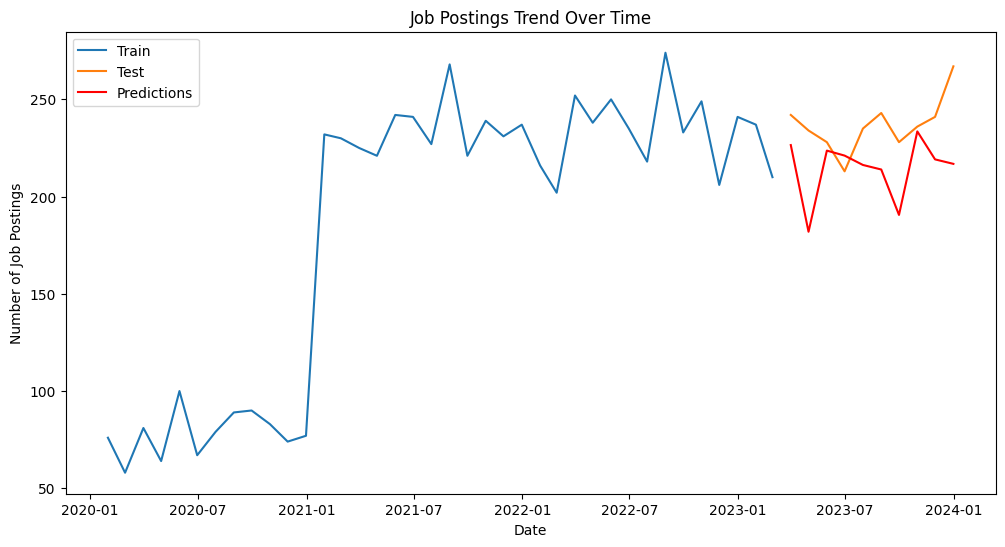

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import seaborn as sns
import joblib
import pickle

# Load and preprocess the trend prediction dataset
trend_data = pd.read_csv('postings2.csv')
trend_data['date_posted'] = pd.to_datetime(trend_data['date_posted'])
trend_data.set_index('date_posted', inplace=True)
monthly_job_postings = trend_data.resample('ME').size()

# Split the data into training and testing sets
train_size = int(len(monthly_job_postings) * 0.8)
print(monthly_job_postings)
train, test = monthly_job_postings[:train_size], monthly_job_postings[train_size:]

# Train the ARIMA model
arima_model = ARIMA(train, order=(17, 1, 0))  # Adjust the order (p, d, q) as needed
arima_model_fit = arima_model.fit()

# Save the ARIMA model
joblib.dump(arima_model_fit, 'arima_model')

# Make predictions and validate the model
predictions = arima_model_fit.forecast(steps=len(test))
mape = mean_absolute_percentage_error(test, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Job Postings Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.show()
